In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install fancyimpute

In [ ]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from fancyimpute import IterativeImputer as MICE
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.decomposition import PCA
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
import pickle
import joblib
from sklearn.neighbors import KNeighborsRegressor


In [ ]:
df = pd.read_csv('./drive/MyDrive/DeberesML/imdb.csv')
df_original = df
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         6178 non-null   object
 1   Date         6178 non-null   int64 
 2   Rate         6178 non-null   object
 3   Votes        6178 non-null   object
 4   Genre        6178 non-null   object
 5   Duration     6178 non-null   object
 6   Type         6178 non-null   object
 7   Certificate  6178 non-null   object
 8   Episodes     6178 non-null   object
 9   Nudity       6178 non-null   object
 10  Violence     6178 non-null   object
 11  Profanity    6178 non-null   object
 12  Alcohol      6178 non-null   object
 13  Frightening  6178 non-null   object
dtypes: int64(1), object(13)
memory usage: 675.8+ KB


#Limpieza

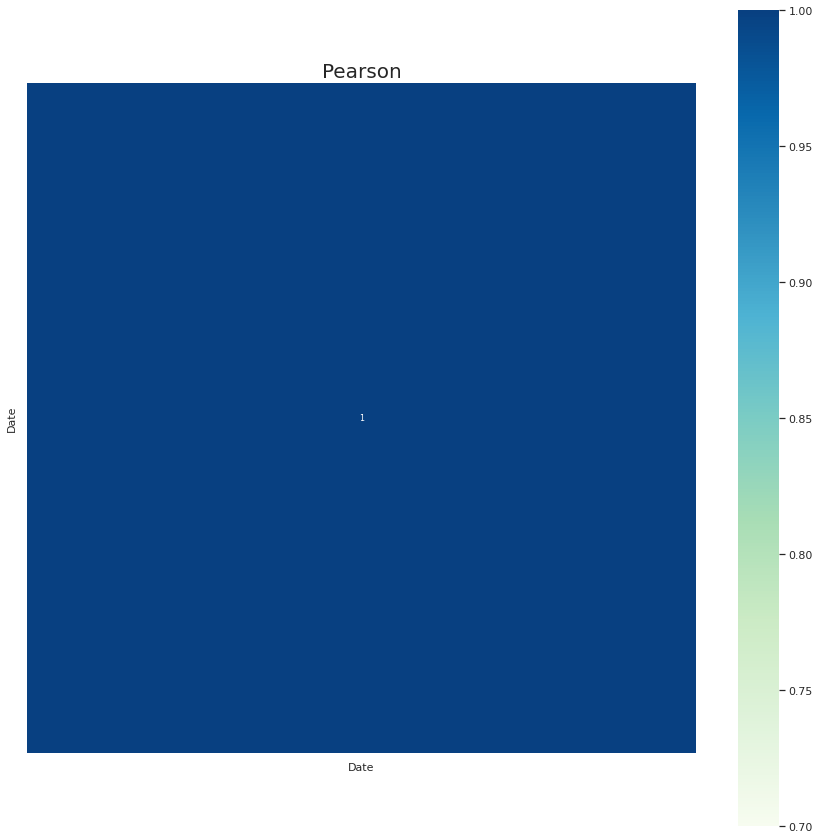

In [ ]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(15,15))
plt.title("Pearson", fontsize = 20)
sns.heatmap(df_original.corr(), vmax= 0.7, square= True, cmap="GnBu", linecolor='b', annot=True, annot_kws= {'size':8} )

##Haciendo Nulos y Flotantes

In [ ]:
df_nuevo = df_original.copy()
df_nuevo["Rate"] = [x.replace("No Rate", "NaN") for x in df_nuevo["Rate"]]
df_nuevo['Rate'] = df_nuevo['Rate'].astype(float, errors = 'raise')
df_nuevo["Votes"] = [x.replace("No Votes", "NaN") for x in df_nuevo["Votes"]]
df_nuevo["Votes"] = [x.replace(",", "") for x in df_nuevo["Votes"]]
df_nuevo['Votes'] = df_nuevo['Votes'].astype(float, errors = 'raise')
df_nuevo["Duration"] = [x.replace("None", "NaN") for x in df_nuevo["Duration"]]
df_nuevo['Duration'] = df_nuevo['Duration'].astype(float, errors = 'raise')
df_nuevo["Episodes"] = [x.replace("-", "NaN") for x in df_nuevo["Episodes"]]
df_nuevo['Episodes'] = df_nuevo['Episodes'].astype(float, errors = 'raise')

In [ ]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         6178 non-null   object 
 1   Date         6178 non-null   int64  
 2   Rate         5993 non-null   float64
 3   Votes        5993 non-null   float64
 4   Genre        6178 non-null   object 
 5   Duration     5877 non-null   float64
 6   Type         6178 non-null   object 
 7   Certificate  6178 non-null   object 
 8   Episodes     1732 non-null   float64
 9   Nudity       6178 non-null   object 
 10  Violence     6178 non-null   object 
 11  Profanity    6178 non-null   object 
 12  Alcohol      6178 non-null   object 
 13  Frightening  6178 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 675.8+ KB


In [ ]:
df_nuevo.isnull().sum()

Name              0
Date              0
Rate            185
Votes           185
Genre             0
Duration        301
Type              0
Certificate       0
Episodes       4446
Nudity            0
Violence          0
Profanity         0
Alcohol           0
Frightening       0
dtype: int64

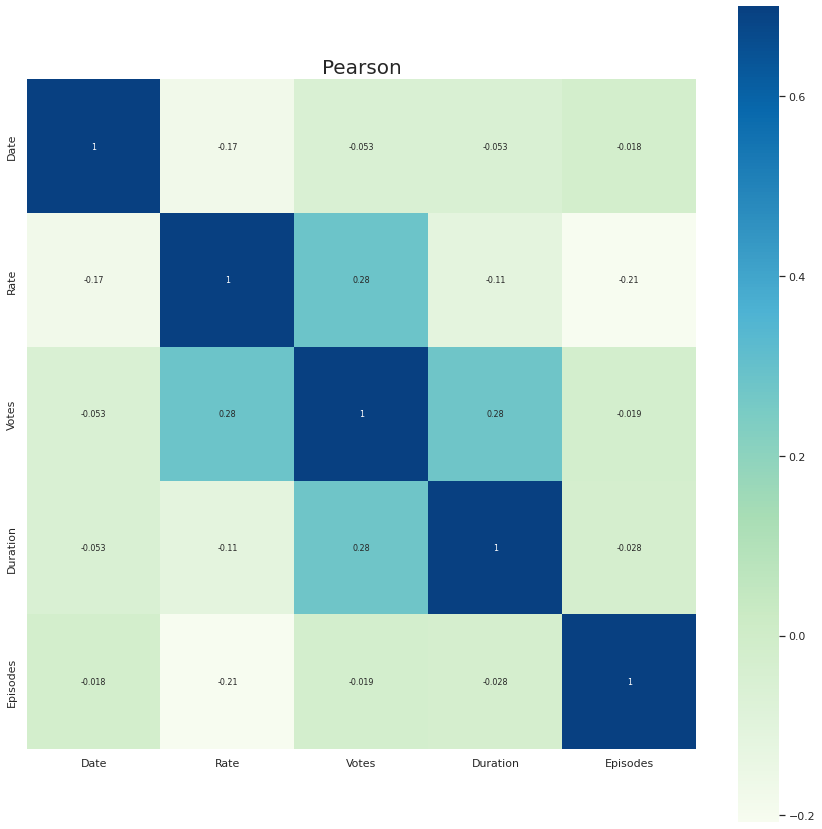

In [ ]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(15,15))
plt.title("Pearson", fontsize = 20)
sns.heatmap(df_nuevo.corr(), vmax= 0.7, square= True, cmap="GnBu", linecolor='b', annot=True, annot_kws= {'size':8} )

In [ ]:
df_nuevo.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Date,6178.0,2005.952574,15.910248,1922.0,1998.0,2011.0,2019.0,2023.0
Rate,5993.0,6.876673,1.081994,1.2,6.2,7.0,7.6,9.7
Votes,5993.0,122363.591857,193047.476169,31.0,14165.0,56565.0,147643.0,2474122.0
Duration,5877.0,94.576995,41.765795,2.0,70.0,100.0,116.0,900.0
Episodes,1732.0,139.314088,776.128067,3.0,16.0,35.0,95.0,14301.0


##Episodio

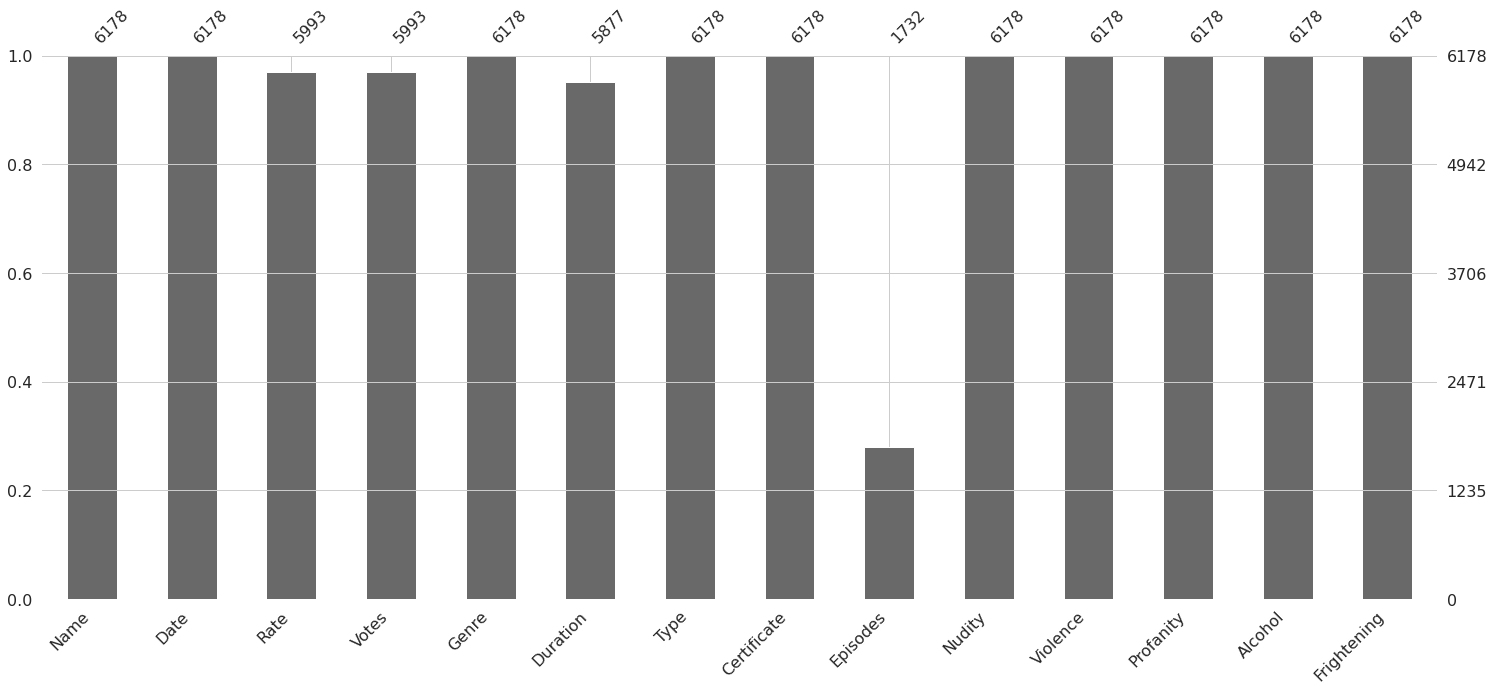

In [ ]:
msno.bar(df_nuevo)

In [ ]:
df_nuevo = df_nuevo.drop(['Episodes'], axis = 1)

##Genero

In [ ]:
'''
df_categorizado_genre = df_nuevo.copy()
df_categorizado_genre.Genre = df_categorizado_genre.Genre.str.replace(' ','')
generos = df_categorizado_genre.Genre.str.get_dummies(sep=",")
df_nuevo  = pd.concat([df_nuevo, generos], axis =1, join= 'inner')
df_nuevo = df_nuevo.drop(['Genre'], axis = 1)
df_nuevo
'''

'\ndf_categorizado_genre = df_nuevo.copy()\ndf_categorizado_genre.Genre = df_categorizado_genre.Genre.str.replace(\' \',\'\')\ngeneros = df_categorizado_genre.Genre.str.get_dummies(sep=",")\ndf_nuevo  = pd.concat([df_nuevo, generos], axis =1, join= \'inner\')\ndf_nuevo = df_nuevo.drop([\'Genre\'], axis = 1)\ndf_nuevo\n'

##Tipo

In [ ]:
df_nuevo["Type"] = df_nuevo["Type"].replace("Film", 1)
df_nuevo["Type"] = df_nuevo["Type"].replace("Series", 0)

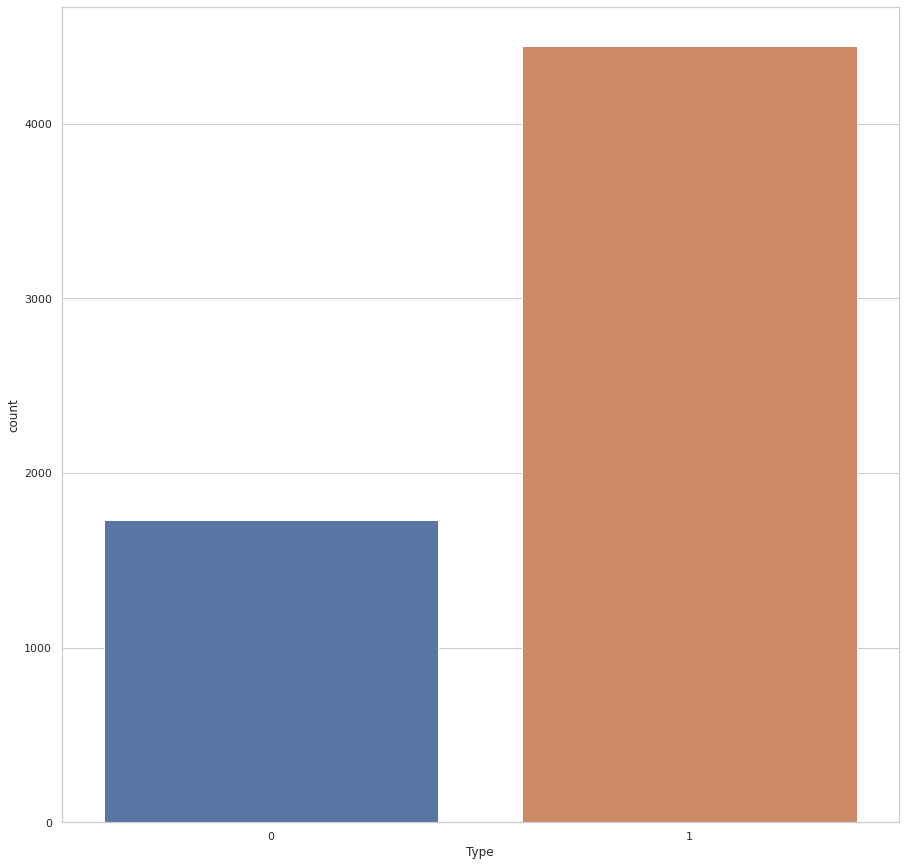

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(x = 'Type',data=df_nuevo)

##Certificado

In [ ]:
df_nuevo["Certificate"] = df_nuevo["Certificate"].replace('TV-Y', '0')
df_nuevo["Certificate"] = df_nuevo["Certificate"].replace('TV-G', '0')
df_nuevo["Certificate"] = df_nuevo["Certificate"].replace('Passed', '0')
df_nuevo["Certificate"] = df_nuevo["Certificate"].replace('Approved', '0')
df_nuevo["Certificate"] = df_nuevo["Certificate"].replace('E', '0')
df_nuevo["Certificate"] = df_nuevo["Certificate"].replace('G', '0')
df_nuevo["Certificate"] = df_nuevo["Certificate"].replace('PG', '0')



df_nuevo["Certificate"] = df_nuevo["Certificate"].replace('TV-Y7-FV', '0')
df_nuevo["Certificate"] = df_nuevo["Certificate"].replace('TV-Y7', '0')


df_nuevo["Certificate"] = df_nuevo["Certificate"].replace('TV-14', '1')
df_nuevo["Certificate"] = df_nuevo["Certificate"].replace('GP', '1')
df_nuevo["Certificate"] = df_nuevo["Certificate"].replace('TV-14', '1')
df_nuevo["Certificate"] = df_nuevo["Certificate"].replace('TV-PG', '1')
df_nuevo["Certificate"] = df_nuevo["Certificate"].replace('M/PG', '1')
df_nuevo["Certificate"] = df_nuevo["Certificate"].replace('PG-13','1')



df_nuevo["Certificate"] = df_nuevo["Certificate"].replace('NC-17', '2')
df_nuevo["Certificate"] = df_nuevo["Certificate"].replace('TV-MA', '2')
df_nuevo["Certificate"] = df_nuevo["Certificate"].replace('M', '2')
df_nuevo["Certificate"] = df_nuevo["Certificate"].replace('X', '2')
df_nuevo["Certificate"] = df_nuevo["Certificate"].replace('R','2')


df_nuevo["Certificate"] = df_nuevo["Certificate"].replace('Not Rated', '3')
df_nuevo["Certificate"] = df_nuevo["Certificate"].replace('Unrated', '3')
df_nuevo["Certificate"] = df_nuevo["Certificate"].replace('(Banned)', '3')
df_nuevo["Certificate"] = df_nuevo["Certificate"].replace('None', '3')

df_nuevo['Certificate'] = df_nuevo['Certificate'].astype(float, errors = 'raise')

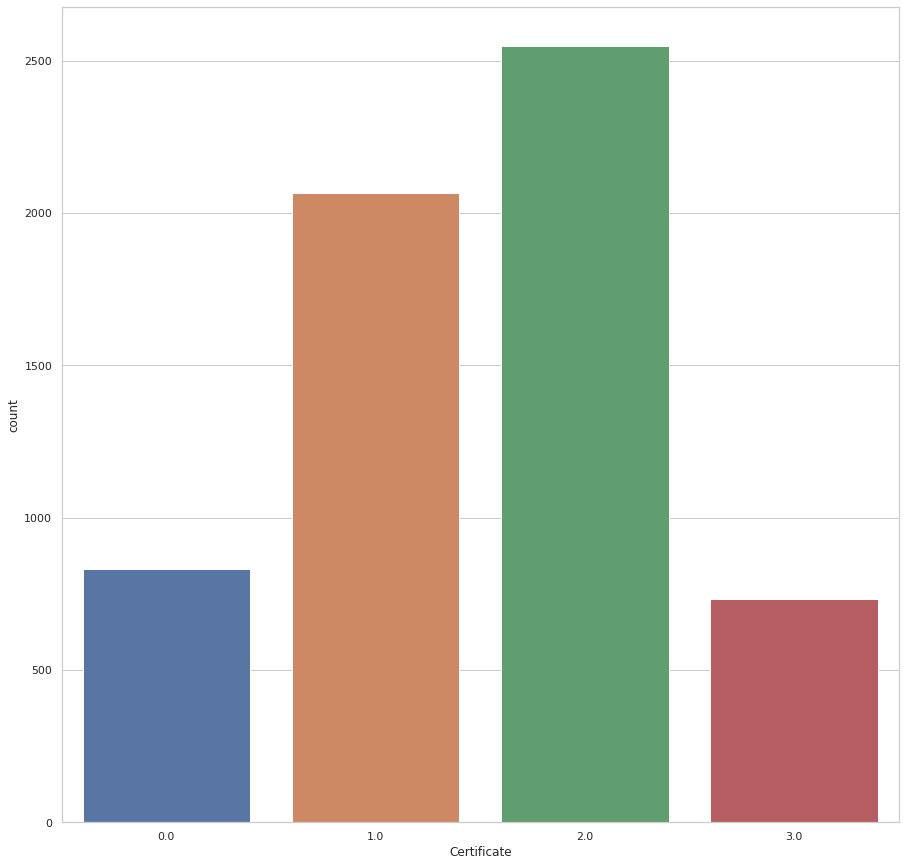

In [ ]:
plt.figure(figsize=(15,15))
sns.countplot(x = 'Certificate',data=df_nuevo)

##Borrando columnas inesarias

In [ ]:
df_nuevo = df_nuevo.drop(['Name','Genre'], axis=1)

In [ ]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         6178 non-null   int64  
 1   Rate         5993 non-null   float64
 2   Votes        5993 non-null   float64
 3   Duration     5877 non-null   float64
 4   Type         6178 non-null   int64  
 5   Certificate  6178 non-null   float64
 6   Nudity       6178 non-null   object 
 7   Violence     6178 non-null   object 
 8   Profanity    6178 non-null   object 
 9   Alcohol      6178 non-null   object 
 10  Frightening  6178 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 531.0+ KB


## Desnudez, Violencia, Profanidad, Alcohol, Atemorizante

In [ ]:
df_nuevo.replace({'None':0,'Mild':1,'Moderate':2,'Severe':3,'No Rate':0}, inplace = True)

In [ ]:
df_nuevo

,Date,Rate,Votes,Duration,Type,Certificate,Nudity,Violence,Profanity,Alcohol,Frightening
0,2021,7.6,107163.0,163.0,1,1.0,1,2,1,1,2
1,2021,6.3,64375.0,90.0,1,2.0,0,0,3,0,2
2,2021,6.4,27145.0,120.0,1,2.0,2,3,3,2,2
3,2021,6.4,30443.0,97.0,1,1.0,0,2,2,1,2
4,2021,8.3,84636.0,155.0,1,1.0,0,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
6173,2011,3.8,37492.0,91.0,1,3.0,3,3,3,1,3
6174,1944,8.3,150448.0,107.0,1,0.0,0,1,0,1,1
6175,2007,7.3,100668.0,117.0,1,2.0,3,2,3,3,3
6176,2021,6.0,887.0,100.0,1,1.0,0,0,1,2,0


In [ ]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6178 entries, 0 to 6177
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         6178 non-null   int64  
 1   Rate         5993 non-null   float64
 2   Votes        5993 non-null   float64
 3   Duration     5877 non-null   float64
 4   Type         6178 non-null   int64  
 5   Certificate  6178 non-null   float64
 6   Nudity       6178 non-null   int64  
 7   Violence     6178 non-null   int64  
 8   Profanity    6178 non-null   int64  
 9   Alcohol      6178 non-null   int64  
 10  Frightening  6178 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 531.0 KB


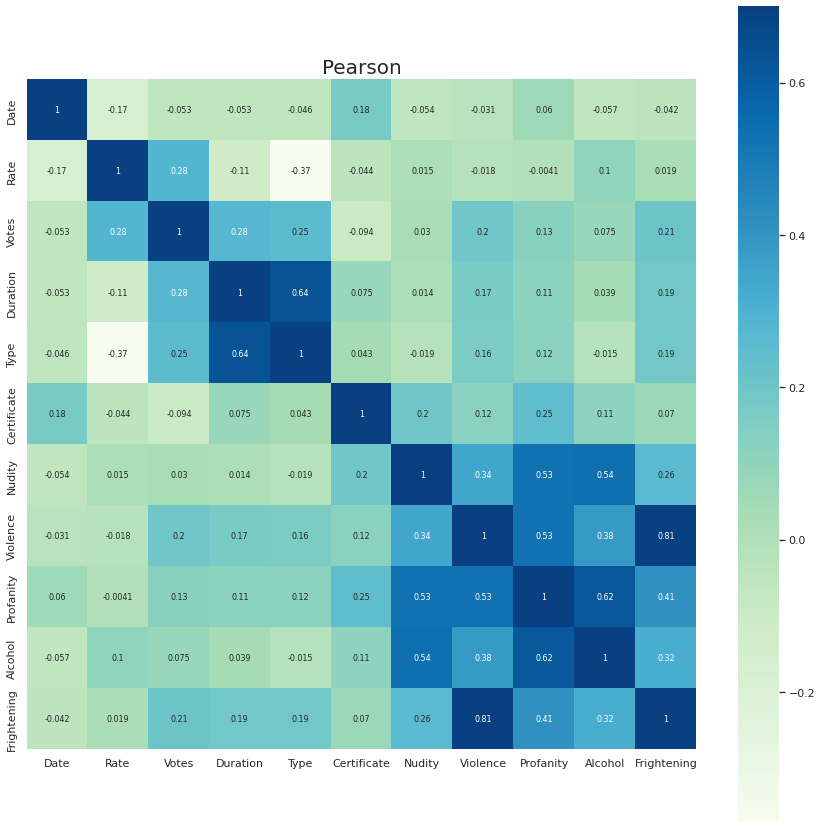

In [ ]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(15,15))
plt.title("Pearson", fontsize = 20)
sns.heatmap(df_nuevo.corr(), vmax= 0.7, square= True, cmap="GnBu", linecolor='b', annot=True, annot_kws= {'size':8} )

In [ ]:
df_nuevo.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Date,6178.0,2005.952574,15.910248,1922.0,1998.0,2011.0,2019.0,2023.0
Rate,5993.0,6.876673,1.081994,1.2,6.2,7.0,7.6,9.7
Votes,5993.0,122363.591857,193047.476169,31.0,14165.0,56565.0,147643.0,2474122.0
Duration,5877.0,94.576995,41.765795,2.0,70.0,100.0,116.0,900.0
Type,6178.0,0.719650,0.449206,0.0,0.0,1.0,1.0,1.0
Certificate,6178.0,1.515053,0.869416,0.0,1.0,2.0,2.0,3.0
Nudity,6178.0,1.003723,0.925675,0.0,0.0,1.0,2.0,3.0
Violence,6178.0,1.459210,1.053546,0.0,1.0,1.0,2.0,3.0
Profanity,6178.0,1.379896,1.015134,0.0,1.0,1.0,2.0,3.0
Alcohol,6178.0,1.006798,0.782448,0.0,0.0,1.0,1.0,3.0


In [ ]:
df_nuevo = df_nuevo.dropna(axis=0, subset=['Rate'])

In [ ]:
df_nuevo

,Date,Rate,Votes,Duration,Type,Certificate,Nudity,Violence,Profanity,Alcohol,Frightening
0,2021,7.6,107163.0,163.0,1,1.0,1,2,1,1,2
1,2021,6.3,64375.0,90.0,1,2.0,0,0,3,0,2
2,2021,6.4,27145.0,120.0,1,2.0,2,3,3,2,2
3,2021,6.4,30443.0,97.0,1,1.0,0,2,2,1,2
4,2021,8.3,84636.0,155.0,1,1.0,0,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
6173,2011,3.8,37492.0,91.0,1,3.0,3,3,3,1,3
6174,1944,8.3,150448.0,107.0,1,0.0,0,1,0,1,1
6175,2007,7.3,100668.0,117.0,1,2.0,3,2,3,3,3
6176,2021,6.0,887.0,100.0,1,1.0,0,0,1,2,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12d94bb9d0>,
      dtype=object)

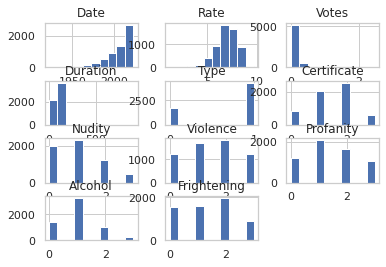

In [ ]:
df_nuevo.hist()

In [ ]:
def trainTestSplit(X,y):
  X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
  return X_train,X_test,y_train,y_test

def generarPCA(n_componentes,X):
  pca = PCA(n_components=n_componentes)
  cp = pca.fit_transform(X)
  return pd.DataFrame(data=cp)

In [ ]:
X = df_nuevo.drop(['Rate'], axis=1)
y = df_nuevo['Rate']

In [ ]:
X

,Date,Votes,Duration,Type,Certificate,Nudity,Violence,Profanity,Alcohol,Frightening
0,2021,107163.0,163.0,1,1.0,1,2,1,1,2
1,2021,64375.0,90.0,1,2.0,0,0,3,0,2
2,2021,27145.0,120.0,1,2.0,2,3,3,2,2
3,2021,30443.0,97.0,1,1.0,0,2,2,1,2
4,2021,84636.0,155.0,1,1.0,0,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...
6173,2011,37492.0,91.0,1,3.0,3,3,3,1,3
6174,1944,150448.0,107.0,1,0.0,0,1,0,1,1
6175,2007,100668.0,117.0,1,2.0,3,2,3,3,3
6176,2021,887.0,100.0,1,1.0,0,0,1,2,0


In [ ]:
X.isnull().sum()

Date             0
Votes            0
Duration       147
Type             0
Certificate      0
Nudity           0
Violence         0
Profanity        0
Alcohol          0
Frightening      0
dtype: int64

In [ ]:
X = X.fillna(X.mean())

In [ ]:
X.isnull().sum()

Date           0
Votes          0
Duration       0
Type           0
Certificate    0
Nudity         0
Violence       0
Profanity      0
Alcohol        0
Frightening    0
dtype: int64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5993 entries, 0 to 6177
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         5993 non-null   int64  
 1   Votes        5993 non-null   float64
 2   Duration     5993 non-null   float64
 3   Type         5993 non-null   int64  
 4   Certificate  5993 non-null   float64
 5   Nudity       5993 non-null   int64  
 6   Violence     5993 non-null   int64  
 7   Profanity    5993 non-null   int64  
 8   Alcohol      5993 non-null   int64  
 9   Frightening  5993 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 515.0 KB


In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
pickle.dump(scaler, open('scaler.sav', 'wb'))



In [ ]:
X

array([[9.80198020e-01, 4.33015600e-02, 1.79287305e-01, ...,
        3.33333333e-01, 3.33333333e-01, 6.66666667e-01],
       [9.80198020e-01, 2.60071275e-02, 9.79955457e-02, ...,
        1.00000000e+00, 0.00000000e+00, 6.66666667e-01],
       [9.80198020e-01, 1.09591765e-02, 1.31403118e-01, ...,
        1.00000000e+00, 6.66666667e-01, 6.66666667e-01],
       ...,
       [8.41584158e-01, 4.06763535e-02, 1.28062361e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [9.80198020e-01, 3.45985657e-04, 1.09131403e-01, ...,
        3.33333333e-01, 6.66666667e-01, 0.00000000e+00],
       [8.51485149e-01, 8.22714282e-02, 1.14699332e-01, ...,
        1.00000000e+00, 3.33333333e-01, 6.66666667e-01]])

In [ ]:
X_train,X_test, y_train,y_test = trainTestSplit(X,y)

In [ ]:
'''
si = SimpleImputer()
mice = MICE()
#X_train = mice.fit_transform(X_train)
#X_test = mice.fit_transform(X_test)

#X_train = pd.DataFrame(si.fit_transform(X_train))
#X_test = pd.DataFrame(si.fit_transform(X_test))
#X_train = generarPCA(2,X_train)
#X_test = generarPCA(2,X_test)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())
scaler = MinMaxScaler()
scaler.fit(X_test)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
pickle.dump(scaler, open('scaler.sav', 'wb'))
'''

"\nsi = SimpleImputer()\nmice = MICE()\n#X_train = mice.fit_transform(X_train)\n#X_test = mice.fit_transform(X_test)\n\n#X_train = pd.DataFrame(si.fit_transform(X_train))\n#X_test = pd.DataFrame(si.fit_transform(X_test))\n#X_train = generarPCA(2,X_train)\n#X_test = generarPCA(2,X_test)\nX_train = X_train.fillna(X_train.mean())\nX_test = X_test.fillna(X_test.mean())\nscaler = MinMaxScaler()\nscaler.fit(X_test)\nscaler.fit(X_train)\nX_train = scaler.transform(X_train)\nX_test = scaler.transform(X_test)\npickle.dump(scaler, open('scaler.sav', 'wb'))\n"

#ANN

In [ ]:
model = Sequential()
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss= 'mse')

In [ ]:
model.fit(x=X_train, y = y_train, validation_data=(X_test,y_test),batch_size=80,epochs=50,verbose=1) 

Epoch 1/50
53/53 [==============================] - 2s 11ms/step - loss: 39.8216 - val_loss: 39.3957
Epoch 2/50
53/53 [==============================] - 0s 6ms/step - loss: 38.7394 - val_loss: 38.3552
Epoch 3/50
53/53 [==============================] - 0s 5ms/step - loss: 37.8805 - val_loss: 37.6977
Epoch 4/50
53/53 [==============================] - 0s 5ms/step - loss: 37.3656 - val_loss: 37.2968
Epoch 5/50
53/53 [==============================] - 0s 8ms/step - loss: 37.0268 - val_loss: 37.0056
Epoch 6/50
53/53 [==============================] - 0s 7ms/step - loss: 36.7656 - val_loss: 36.7743
Epoch 7/50
53/53 [==============================] - 0s 8ms/step - loss: 36.5634 - val_loss: 36.6015
Epoch 8/50
53/53 [==============================] - 0s 7ms/step - loss: 36.4139 - val_loss: 36.4734
Epoch 9/50
53/53 [==============================] - 0s 7ms/step - loss: 36.3017 - val_loss: 36.3755
Epoch 10/50
53/53 [==============================] - 0s 7ms/step - loss: 36.2149 - val_loss: 36.298

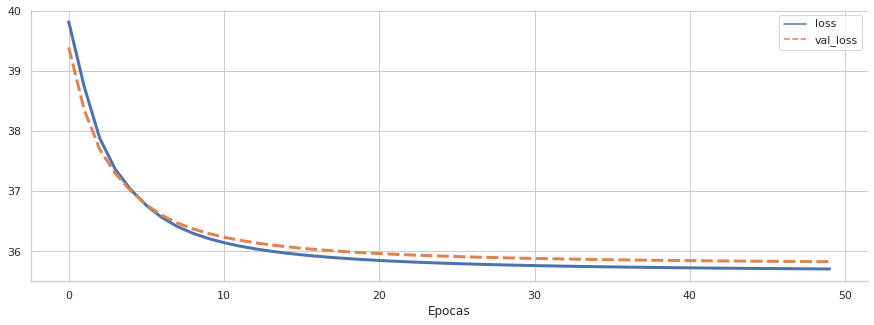

In [ ]:
loss= pd.DataFrame(model.history.history)
plt.figure(figsize=(15,5))
sns.lineplot(data=loss, lw=3)
plt.xlabel('Epocas')
sns.despine()

In [ ]:
r2_score(y_train, model.predict(X_train))

-29.955386270746565

In [ ]:
r2_score(y_test, model.predict(X_test))

-28.607763587717898

#Random Forest

In [ ]:
modelRandom = RandomForestRegressor(n_estimators=10, random_state=0)
modelRandom.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
r2_score(y_train, modelRandom.predict(X_train))

0.9202278859992372

In [ ]:
r2_score(y_test, modelRandom.predict(X_test))

0.5666335134231499

In [ ]:
pickle.dump(modelRandom, open('random_forest.sav', 'wb'))

In [ ]:
mean_absolute_error(y_test, modelRandom.predict(X_test))

0.5164571746384872

In [ ]:
mean_absolute_error(y_train, modelRandom.predict(X_train))

0.19857926102502985

#Regresion Lineal

In [ ]:
rl = LinearRegression()
rl.fit(X_train, y_train)

LinearRegression()

In [ ]:
r2_score(y_train, rl.predict(X_train))

0.340436420872959

In [ ]:
r2_score(y_test, rl.predict(X_test))

0.34059843605662266

In [ ]:

pickle.dump(rl, open('linear_regression.sav', 'wb'))

In [ ]:
mean_absolute_error(y_test, rl.predict(X_test))

0.6769038570140363

In [ ]:
mean_absolute_error(y_test, rl.predict(X_test))

0.6769038570140363

#SVR

In [ ]:
svr = SVR(kernel="poly",verbose=True) 

In [ ]:
svr.fit(X_train,y_train)

[LibSVM]

SVR(kernel='poly', verbose=True)

In [ ]:
svr.score(X_train,y_train)

0.44068168878881764

In [ ]:
svr.score(X_test,y_test)

0.409553818259083

In [ ]:

pickle.dump(svr, open('svr.sav', 'wb'))

In [ ]:
mean_absolute_error(y_test, svr.predict(X_test))

0.6127329126787264

In [ ]:
mean_absolute_error(y_test, svr.predict(X_test))

0.6127329126787264

#KNN

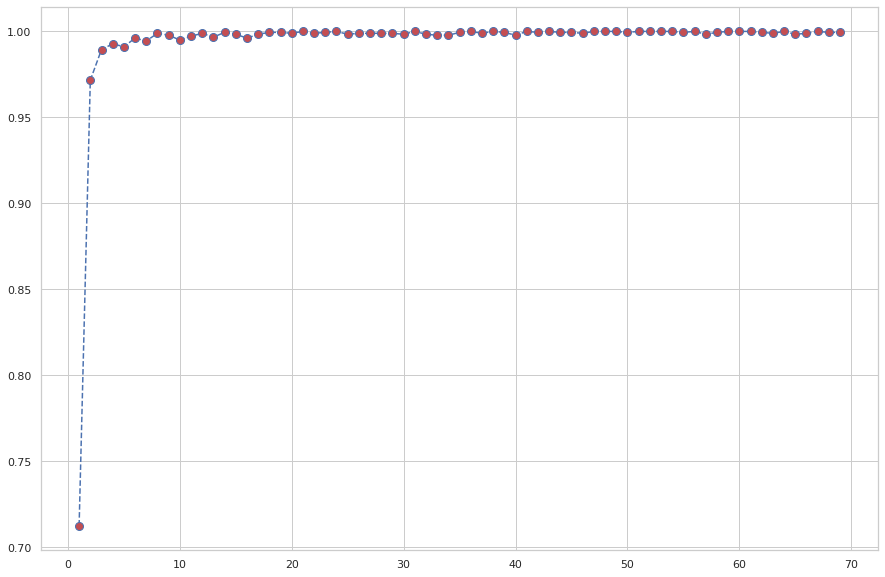

In [ ]:
error = []
for n in range(1,70):
  knn = KNeighborsRegressor(n_neighbors=n)
  knn.fit(X_train, y_train)
  predict_n = knn.predict(X_test)
  error.append(np.mean(predict_n != y_test))
plt.figure(figsize=(15,10))
plt.plot(range(1,70), error, color='b', linestyle = 'dashed', marker = 'o', markerfacecolor = 'r', markersize = '8')

In [ ]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [ ]:
knn.score(X_train, y_train)

1.0

In [ ]:
knn.score(X_test, y_test)

0.07491832309933066

In [ ]:
r2_score(y_train, knn.predict(X_train))

1.0

In [ ]:
r2_score(y_test, knn.predict(X_test))

0.07491832309933066

In [ ]:
mean_absolute_error(y_train, knn.predict(X_train))

0.0

In [ ]:
mean_absolute_error(y_test, knn.predict(X_test))

0.6653503893214683

In [ ]:

pickle.dump(knn, open("knn.sav", 'wb'))